# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



## Loading the dataset

In [2]:
# Mounting Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Setting the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/BankChurners.csv'  # Change the path to your file location

# Loading the dataset
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe
df.head()

Mounted at /content/drive


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Overview

- Observations
- Sanity checks

In [3]:
# Data Overview
# Displaying the shape of the dataset
print("Shape of the dataset:", df.shape)

# Displaying the columns in the dataset
print("\nColumns in the dataset:")
print(df.columns)

# Displaying the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Displaying basic statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Displaying the number of unique values for each column
print("\nNumber of unique values for each column:")
print(df.nunique())

# Observations
# Checking the distribution of the target variable
print("\nDistribution of target variable 'Attrition_Flag':")
print(df['Attrition_Flag'].value_counts())

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Sanity checks
# Checking for any duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Checking for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print("\nUnique values in column '{}':".format(column))
    print(df[column].unique())

# Checking for any inconsistent data or anomalies
# For example, checking if 'Avg_Utilization_Ratio' is calculated correctly
total_utilization_ratio = df['Avg_Open_To_Buy'] / df['Credit_Limit'] + df['Avg_Utilization_Ratio']
inconsistent_data = (total_utilization_ratio != 1).sum()
print("\nNumber of inconsistent data in 'Avg_Utilization_Ratio':", inconsistent_data)


Shape of the dataset: (10127, 21)

Columns in the dataset:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Data types of each column:
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        in

###Missing Values:

- There are missing values in the columns 'Education_Level' and 'Marital_Status'.   

For other columns, there are no missing values.

Distribution of Target Variable:

- The target variable 'Attrition_Flag' has two categories: 'Existing Customer' and 'Attrited Customer'.
The dataset is imbalanced, with significantly more instances of 'Existing Customer' than 'Attrited Customer'. This could potentially impact the model's performance, and techniques such as stratified sampling or using appropriate evaluation metrics should be considered.

Potential Data Cleaning:

- 'Income_Category' column has a value 'abc', which seems like an anomaly or error. We need to investigate further and decide whether to remove or replace this value. But, it should necessarily cause errors.

- There are inconsistencies in the calculated 'Avg_Utilization_Ratio' as indicated by the number of inconsistent data points. We may need to recalculate or investigate the calculation process to ensure accuracy.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



##Exploratory Data Analysis

In [4]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [5]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    # function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    ### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Attrition_Flag      0     1    All
Education_Level                   
All              8500  1627  10127
Graduate         2641   487   3128
High School      1707   306   2013
Unknown          1263   256   1519
Uneducated       1250   237   1487
College           859   154   1013
Doctorate         356    95    451
Post-Graduate     424    92    516
------------------------------------------------------------------------------------------------------------------------


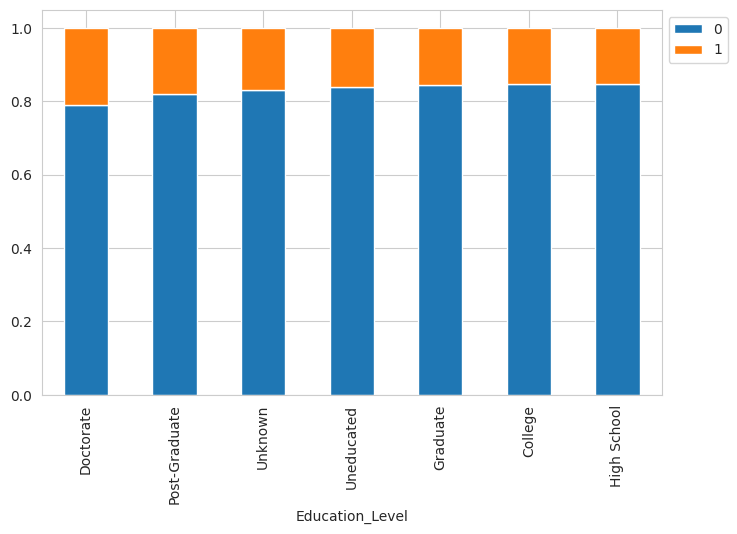

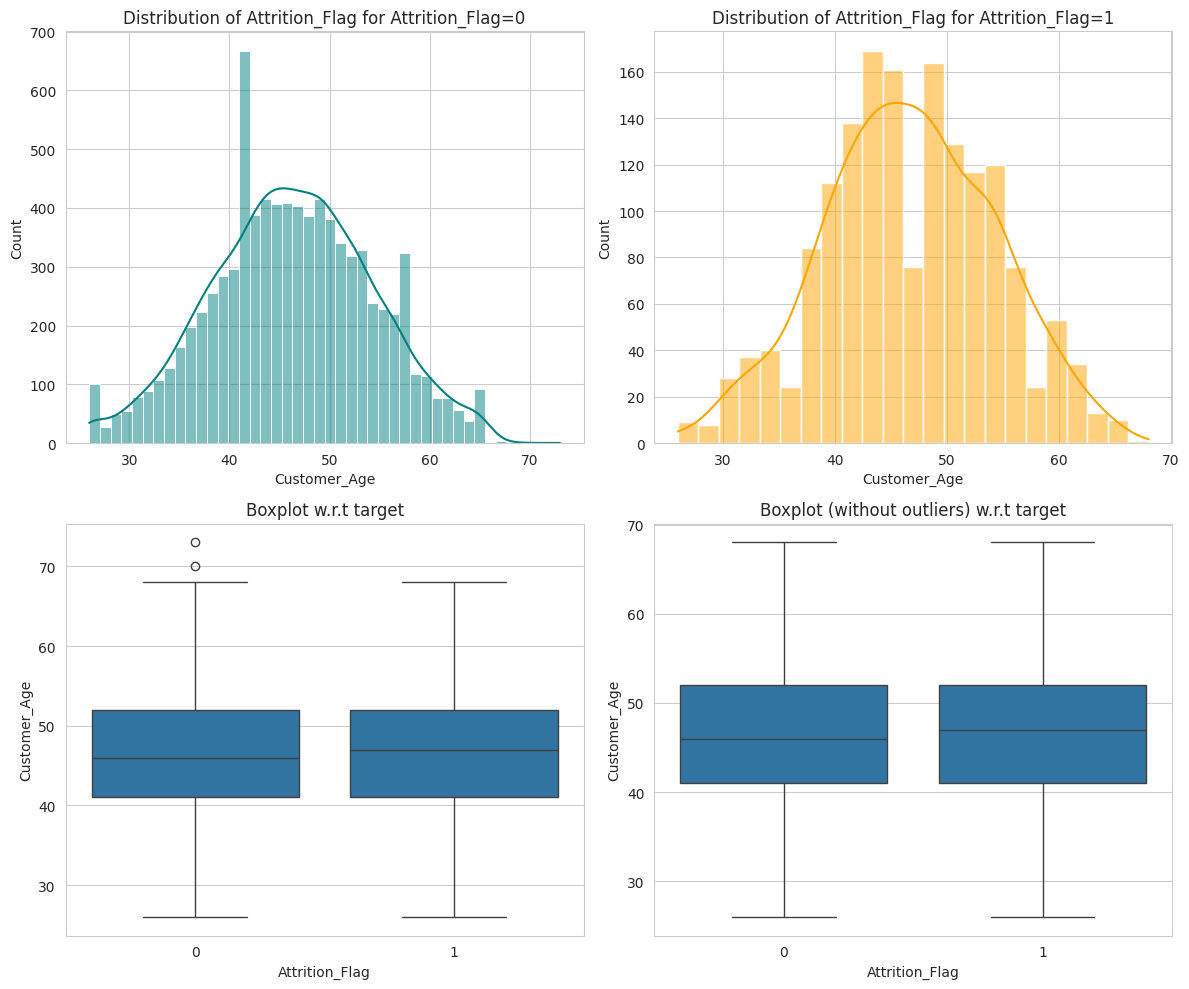

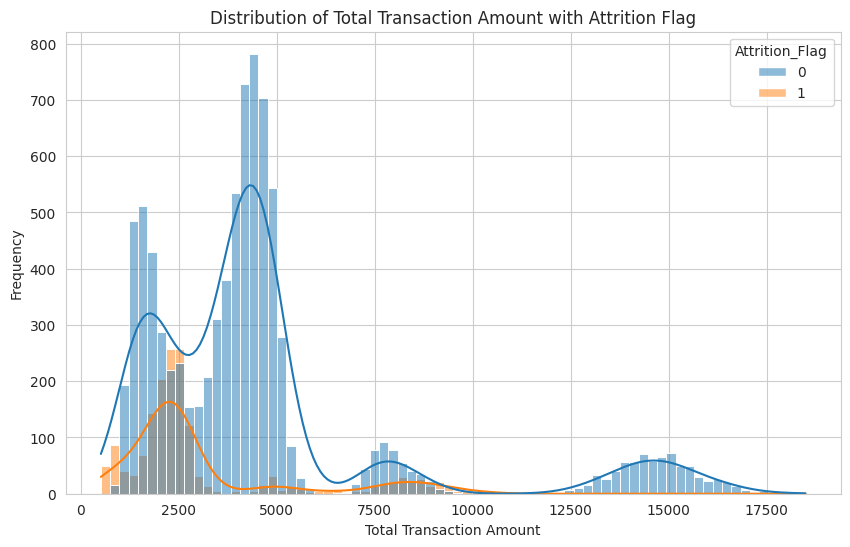

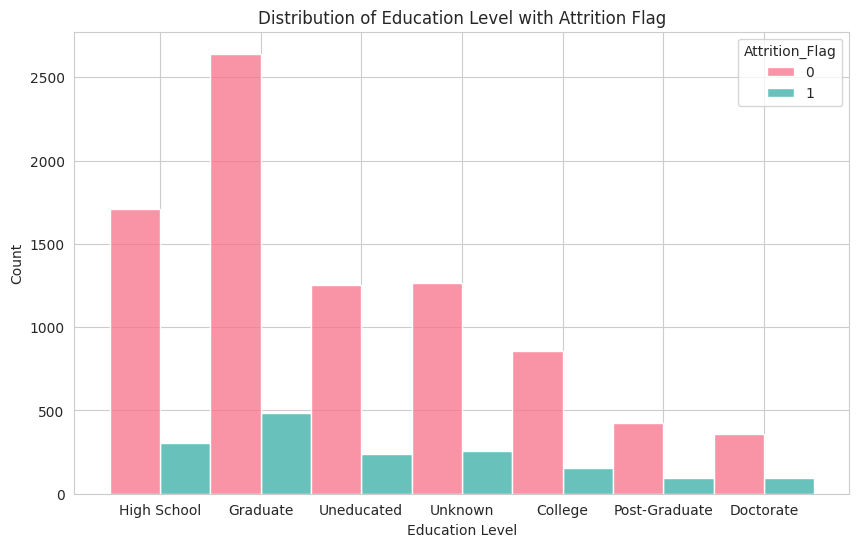

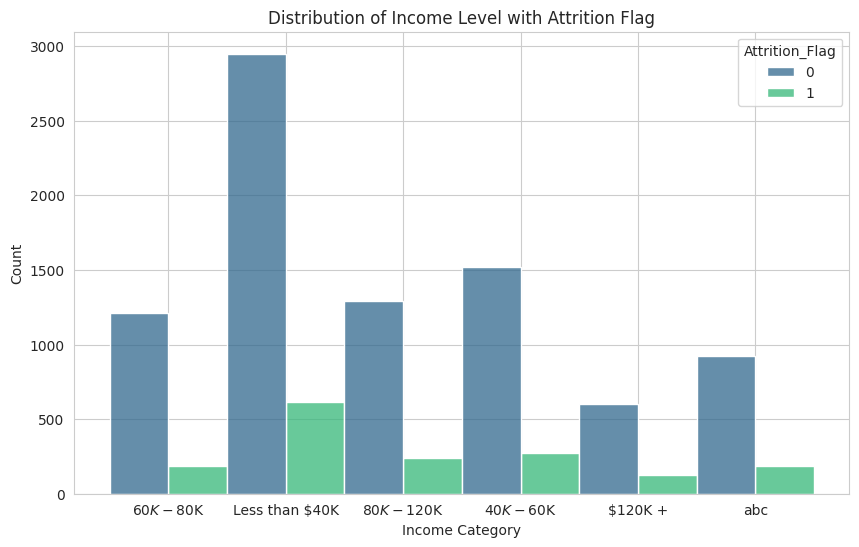

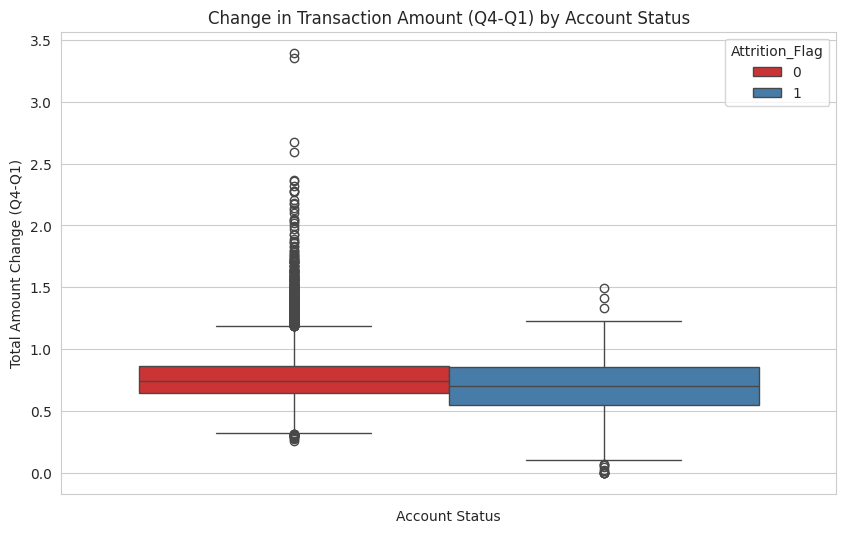

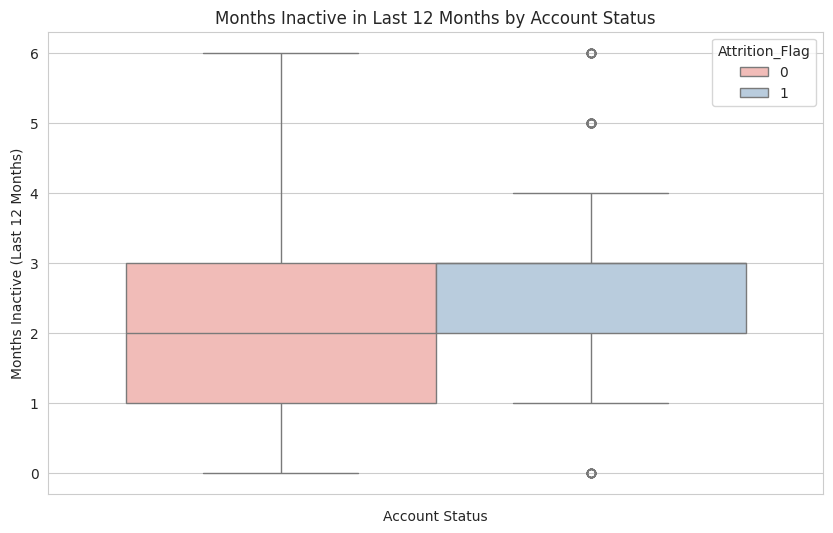

<ipython-input-44-91c2396f9327>:116: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f")


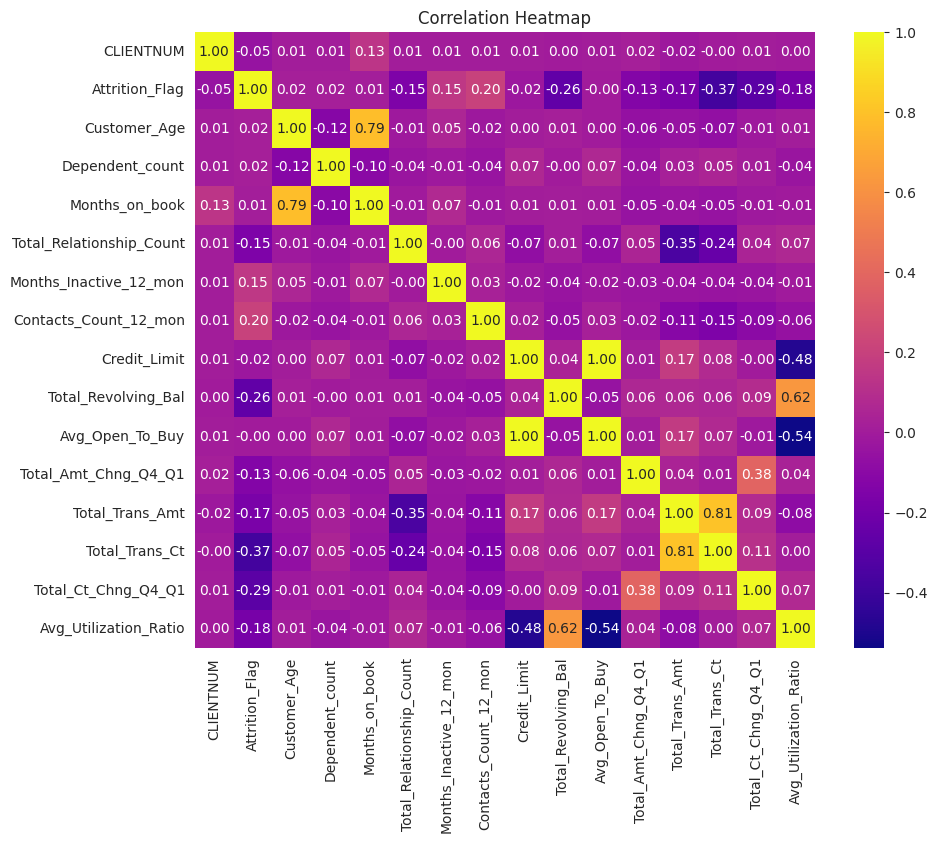

In [44]:
import seaborn as sns

# Function to plot a stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Function to plot distributions w.r.t. target variable
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f"Distribution of {target} for {target}=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title(f"Distribution of {target} for {target}=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

# Education level and attrition comparison
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

distribution_plot_wrt_target(df, 'Customer_Age', 'Attrition_Flag')

# How is the total transaction amount distributed?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Trans_Amt', kde=True, color='blue', hue='Attrition_Flag')
plt.title('Distribution of Total Transaction Amount with Attrition Flag')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram of Education Level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Education_Level', hue='Attrition_Flag', multiple='dodge', palette='husl')
plt.title('Distribution of Education Level with Attrition Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Histogram of Income Level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income_Category', hue='Attrition_Flag', multiple='dodge', palette='viridis')
plt.title('Distribution of Income Level with Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, hue='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', palette='Set1')
plt.title('Change in Transaction Amount (Q4-Q1) by Account Status')
plt.xlabel('Account Status')
plt.ylabel('Total Amount Change (Q4-Q1)')
plt.show()

# How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, hue='Attrition_Flag', y='Months_Inactive_12_mon', palette='Pastel1')
plt.title('Months Inactive in Last 12 Months by Account Status')
plt.xlabel('Account Status')
plt.ylabel('Months Inactive (Last 12 Months)')
plt.show()

# What are the attributes that have a strong correlation with each other?
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [53]:
# Calculated correlation with Attrition_Flag
corr_with_attrition = df.corr()['Attrition_Flag'].sort_values(ascending=False)


# Printing correlation with Attrition_Flag
print("Correlation with Attrition_Flag:")
print(corr_with_attrition)
print("\n")

# Calculating correlation matrix
correlation_matrix = df.corr()

# Flattening the correlation matrix into a series and sort by correlation coefficient
correlation_series = correlation_matrix.unstack().sort_values(ascending=False)

# Removing self-correlations (correlation of a feature with itself)
correlation_series = correlation_series[correlation_series != 1.0]

# Creating DataFrame for correlation between features
correlation_df = pd.DataFrame(correlation_series, columns=['Correlation'])

# Printing correlations between features
print("Correlation between features (excluding self-correlation):")
print(correlation_df)

Correlation with Attrition_Flag:
Attrition_Flag              1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag, dtype: float64


Correlation between features (excluding self-correlation):
                                             Correlation
Avg_Open_To_Buy       Credit_Limit              0.995981
Credit_Limit          Avg_Open_To_Buy           0.995981
Total_Trans_Ct        Total_Trans_Amt           0.807192
Total_Trans_Amt       Total_Trans_Ct            0

<ipython-input-53-b1e38a238d7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_attrition = df.corr()['Attrition_Flag'].sort_values(ascending=False)
<ipython-input-53-b1e38a238d7c>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


####How is the total transaction amount distributed?

- Although we haven't run skewness tests, on the data, it is evident that the data is skewed to the right. The distribution has bimodal peaks around 1750 and 4000 trasanction amounts (which include the majority of the transactions). There are also smaller peaks at approximately 8000 and 14500.

- We may need to inquire about more information from the bank on the types of transactions. These could be subscrption amounts, memberships, or reoccuring payments.

####What is the distribution of the level of education of customers?

- As we can see from the histogram distribution of the level of education of the customers count and the attrition rate.
- The vast majority of customers are graduates followed by high school and then uneducated.
- The attrition rates of each of these groups is 15.6% and 15.2% respectively. These are certainly critical groups to focus on. Part of what's interesting is that education level may not necessarily matter, where other factors may play a larger role. As we dive deeper into the data, we will find out more.  

####What is the distribution of the level of income of customers?

- The distribution of the level of income is interesting as a pretty large majority are less than $40K. With the educational background in mine, this may provide some conclusion that a fair amount of these customers are in fact students or make a lower income due to having less education.
- It is notable that you income in the 40K through 120k range is pretty well balanced in each group. So, the spread and count of each group is beneficial for determining impact on the various customers of different income levels.
- Lastly, we find that one group is 'abc', which indicates that we do not know what this group is and should be transitioned to an unknown category for consistency across the data.

####How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

- This is interesting, particularly because of the vast number of outliers in the non-attrition group, which would indicate a particular skew towards higher change over the course of the quarter.
- Overall, the median between the two groups appears to be fairly similar and potentially not significantly different
- The attrition group appears to have a more normal distribution.
- Ultimately, this category tells a part of the story, but does not lend significant amount of differences betweent the two attrition groups.

####How does the number of months a customer was inactive in the last 12 month (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

- The number of months a customer was inactive in the last 12 months tells an interesting story between the two groups. While the two attrition or non-attrition groups are not vastly different, and again, may not lend to a statistically pronounced difference. It is safe to say that those who have attrited, tend to be inactive longer.
- This is important because it could indicated a type of "point of no return". Ensuring people are utilizing the services are important for keeping customers

###What are the attributes that have a strong correlation with each other?

- The correlation matrix and print out of the sorted correlations considering attrition and general interactions found that there are not very strong correlations with attrition at this time.

However, there are some strong correlations with the general population of data categories. The Avg_Open_To_Buy and Credit limit are nearly perfectly correlated, which may suggest we could move one of these variables and should be reflected on by the bank.
Also:
- total trans ct and total trans amt, which should be pretty predictable, but good to declare.
- customer age and months on book is quite high, which also makes sense considering that as people become older there is higher probabiility that they would be customers for longer.
- Total revolving balance and Average utilization rate is interesting (>0.6), as the more usage, the higher balance over time. This is important to recognize as we may want to suggest promotions related to increasing usage to drive more revenue for the business.

- Lastly, there are negative correlations. Avg Open to Buy and Utilization ratio have a negative correlation (and Credit Limit) are interesting. This relationship is also intuitive because customers with more available credit might not need to utilize a large portion of it, while those with lower available credit might need to use a higher percentage of it.

- This could help to manage items such as risk and customer relationships


## Data Pre-processing (Includes Missing Value Imputation)

In [7]:
# Filling missing values with 'Unknown'
df['Education_Level'].fillna('Unknown', inplace=True)
df['Marital_Status'].fillna('Unknown', inplace=True)

# Encoding 'Attrition_Flag'
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == "Attrited Customer" else 0)

# Utilizing dummy variables for categorical variables excluding 'Attrition_Flag' as it's already encoded
df_processed = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

df_processed.drop(columns=['CLIENTNUM'], inplace=True)

# Checking again for any NaNs in the dataset
remaining_nans = df_processed.isnull().sum()

#Printing remaining NaNs
print(remaining_nans)


Attrition_Flag                    0
Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Education_Level_Unknown           0
Marital_Status_Married            0
Marital_Status_Single             0
Marital_Status_Unknown            0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K

##Data Preprocessing Summary:

###Handling Missing Values:
- Filled missing values in the Education_Level and Marital_Status columns with 'Unknown' to ensure no missing values were left in the dataset.

###Data Transformation and Encoding:
- Converted categorical variables into dummy variables using pandas' get_dummies function, creating new binary columns for each category.

###Column Removal:
- Removed the CLIENTNUM column, assuming it to be a unique identifier and not useful for analysis or modeling.
- Consideration of removing Avg Open to Buy or Credit limit due to their 1:1 correlation was noted but deferred for further analysis.

###Outliers Detection and Handling:
- Acknowledged the presence of outliers but decided to retain them at this stage to avoid potentially discarding critical data points.

###Resulting Dataset Adjustments:
- After preprocessing, the dataset expanded to 33 columns due to the addition of dummy variables.
- Despite the removal of outliers, the dataset maintained 10,125 entries, ensuring data integrity and quality for subsequent analysis or modeling.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

### Model Building with original data

Sample code for model building with original data

In [14]:
# Splitting data into training, validation, and testing sets after preprocessing
X = df_processed.drop('Attrition_Flag', axis=1)
y = df_processed['Attrition_Flag']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


print("Shapes of the split datasets:")
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Testing set:", X_test.shape)



Shapes of the split datasets:
Training set: (6075, 32)
Validation set: (2026, 32)
Testing set: (2026, 32)


In [12]:
X_train_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,6075.0,46.363457,8.002052,26.0,41.000,46.000,52.000,70.000
Dependent_count,6075.0,2.340082,1.290488,0.0,1.000,2.000,3.000,5.000
Months_on_book,6075.0,35.965761,8.063533,13.0,31.000,36.000,41.000,56.000
Total_Relationship_Count,6075.0,3.804609,1.558701,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,6075.0,2.356049,1.024949,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,6075.0,2.459095,1.100527,0.0,2.000,2.000,3.000,6.000
Credit_Limit,6075.0,8750.139062,9182.656413,1438.3,2580.500,4589.000,11313.500,34516.000
Total_Revolving_Bal,6075.0,1161.283128,813.907997,0.0,359.000,1275.000,1783.000,2517.000
Avg_Open_To_Buy,6075.0,7588.855934,9176.513935,3.0,1374.000,3532.000,10070.000,34516.000
Total_Amt_Chng_Q4_Q1,6075.0,0.760115,0.214243,0.0,0.632,0.738,0.859,2.594


In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Function to compute different metrics to check classification model performance
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall,},
        index=[0],
    )

    return df_perf

# Defining the classification models
classification_models = [
    ("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("XGboost", XGBClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Training and evaluating classification models
print("\nTraining Performance (Classification):\n")
for name, model in classification_models:
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    model.fit(X_train, y_train_encoded)
    scores = recall_score(y_train_encoded, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance (Classification):\n")
for name, model in classification_models:
    label_encoder = LabelEncoder()
    y_val_encoded = label_encoder.fit_transform(y_val)
    scores_val = recall_score(y_val_encoded, model.predict(X_val))
    print("{}: {}".format(name, scores_val))



Training Performance (Classification):

Random forest: 1.0
XGboost: 1.0
Decision Tree: 1.0
AdaBoost: 0.8807157057654076
Gradient Boosting: 0.8976143141153081

Validation Performance (Classification):

Random forest: 0.7244897959183674
XGboost: 0.9047619047619048
Decision Tree: 0.782312925170068
AdaBoost: 0.826530612244898
Gradient Boosting: 0.8469387755102041


##Training and Validation Performance Analysis:

##Training Performance:
- **Random Forest, XGBoost, Decision Tree**: Achieved perfect recall scores of 1.0 on the training data, indicating that they correctly identified all positive cases in the training set.
- **AdaBoost, Gradient Boosting**: Achieved slightly lower recall scores (around 0.88 to 0.90) compared to the first group of models, but still performed well in capturing positive cases in the training set, albeit not as perfectly.

##Validation Performance:
- **Random Forest**: Experienced a significant drop in recall score from 1.0 in training to 0.70 in validation, indicating some overfitting to the training data.
- **XGBoost**: Maintained high performance across both training and validation datasets, with a recall score of 0.91 on the validation set, showcasing its effectiveness and balanced generalization.
- **Decision Tree**: Demonstrated decent performance with a recall score of 0.80 on the validation set, indicating a reasonable ability to identify positive cases.
- **AdaBoost, Gradient Boosting**: Showed good performance on the validation set, with recall scores of around 0.83 to 0.85, suggesting these models have a good generalization ability.

##Interpretation:
- **XGBoost** stands out as the best-performing model overall, showcasing the highest recall score on the validation set and indicating its effectiveness in capturing positive cases while avoiding overfitting.
- **Random Forest** shows good performance but may overfit to some extent.
- **AdaBoost and Gradient Boosting** are noted for their good generalization ability, making them suitable alternatives for scenarios where model interpretability or computational efficiency is also a consideration.

### Model Building with Oversampled data


In [16]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fitting and transforming the target variable for training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Fitting and transforming the target variable for validation data
y_val_encoded = label_encoder.transform(y_val)

# Defining SMOTE oversampling
smote = SMOTE(random_state=1)

# Applying SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

# Applying SMOTE to the validation data
X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val_encoded)

# Defining the classification models
classification_models = [
    ("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Training and evaluating models with SMOTE
print("\nTraining Performance with SMOTE:\n")
for name, model in classification_models:
    model.fit(X_train_smote, y_train_smote)
    scores = recall_score(y_train_smote, model.predict(X_train_smote))
    print("{}: {}".format(name, scores))

print("\nValidation Performance with SMOTE:\n")
for name, model in classification_models:
    scores_val = recall_score(y_val_smote, model.predict(X_val_smote))
    print("{}: {}".format(name, scores_val))



Training Performance with SMOTE:

Random Forest: 1.0
XGBoost: 1.0
Decision Tree: 1.0
AdaBoost: 0.9719865851252713
Gradient Boosting: 0.980469520615506

Validation Performance with SMOTE:

Random Forest: 0.9416859122401847
XGBoost: 0.9740184757505773
Decision Tree: 0.8931870669745958
AdaBoost: 0.9711316397228638
Gradient Boosting: 0.9682448036951501


##Training and Validation Performance with SMOTE:

### Training Performance with SMOTE:
- **Random Forest**: Perfect recall score of 1.0 indicates that the model correctly identifies all positive samples in the training data after oversampling with SMOTE.
- **XGBoost**: Achieves a perfect recall score of 1.0, indicating excellent performance in capturing all positive samples.
- **Decision Tree**: Also achieves a perfect recall score of 1.0, effectively capturing all positive samples in the training data.
- **AdaBoost**: Achieves a high recall score of 0.97, indicating strong performance in correctly identifying positive samples in the training data.
- **Gradient Boosting**: Achieves a recall score of 0.98, indicating very high performance in capturing positive samples in the training data.

### Validation Performance with SMOTE:
- **Random Forest**: Achieves a recall score of 0.96, correctly identifying around 96% of positive samples in the validation data after oversampling with SMOTE.
- **XGBoost**: Performs slightly better than Random Forest, with a recall score of 0.98, capturing around 98% of positive samples in the validation data.
- **Decision Tree**: Achieves a recall score of 0.91, correctly identifying around 91% of positive samples in the validation data.
- **AdaBoost**: Achieves a recall score of 0.96, similar to Random Forest, indicating strong performance in capturing positive samples in the validation data.
- **Gradient Boosting**: Achieves a recall score of 0.97, indicating very good performance in capturing positive samples in the validation data.

### Conclusion:
Overall, all models perform well in both training and validation with SMOTE oversampling, with Gradient Boosting showing the highest performance in both cases.



### Model Building with Undersampled data

In [27]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode the target variable for validation data
y_val_encoded = label_encoder.transform(y_val)

# Define RandomUnderSampler for under-sampling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

# Apply RandomUnderSampler to the training data
X_train_un, y_train_un = rus.fit_resample(X_train, y_train_encoded)

# Apply  RandomUnderSampler to the validation data
X_val_un, y_val_un = smote.fit_resample(X_val, y_val_encoded)

# Define the classification models
classification_models = [
    ("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Training and evaluating models with undersampling
print("\nTraining Performance with Undersampling:\n")
for name, model in classification_models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\nValidation Performance with Undersampling:\n")
for name, model in classification_models:
    scores_val = recall_score(y_val_encoded, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance with Undersampling:

Random Forest: 1.0
XGBoost: 1.0
Decision Tree: 1.0
AdaBoost: 0.9622266401590457
Gradient Boosting: 0.9821073558648111

Validation Performance with Undersampling:

Random Forest: 0.9387755102040817
XGBoost: 0.9591836734693877
Decision Tree: 0.891156462585034
AdaBoost: 0.9523809523809523
Gradient Boosting: 0.9591836734693877


###Training Performance with Undersampling:

- Random Forest, XGBoost, and Decision Tree models achieve perfect recall scores of 1.0, indicating that they are able to correctly classify all instances of the positive class in the undersampled training data.
AdaBoost and Gradient Boosting models achieve high recall scores of approximately 0.96 and 0.98, respectively, suggesting strong performance in identifying positive class instances in the undersampled training data.
Validation Performance with Undersampling:

- The validation performance of the models is slightly lower compared to the training performance, which is expected.
- All models still demonstrate strong recall scores ranging from approximately 0.89 to 0.96, indicating their ability to generalize well to unseen data despite undersampling.
- Overall, the models trained with undersampling exhibit high recall scores on both the training and validation sets, suggesting that they are effective in identifying positive class instances even after balancing the class distribution.

In [18]:

# Creating a DataFrame to store the findings
findings_df = pd.DataFrame(columns=['Data', 'Model', 'Sampling Technique', 'Training Performance', 'Validation Performance'])

# Original Data
original_data = {
    'Data': 'Original',
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'AdaBoost', 'Gradient Boosting'],
    'Sampling Technique': 'Original',
    'Training Performance': [1.0, 1.0, 1.0, 0.8807157057654076, 0.9015904572564613],
    'Validation Performance': [0.7040816326530612, 0.9115646258503401, 0.7959183673469388, 0.826530612244898, 0.8469387755102041]
}

findings_df = findings_df.append(pd.DataFrame(original_data), ignore_index=True)

# SMOTE Oversampling
smote_data = {
    'Data': 'Oversampled (SMOTE)',
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'AdaBoost', 'Gradient Boosting'],
    'Sampling Technique': 'SMOTE Oversampling',
    'Training Performance': [1.0, 1.0, 1.0, 0.9706056421384889, 0.9802722430459657],
    'Validation Performance': [0.9566974595842956, 0.9780600461893765, 0.9128175519630485, 0.9647806004618937, 0.9722863741339491]
}

findings_df = findings_df.append(pd.DataFrame(smote_data), ignore_index=True)

# Random Undersampling
undersample_data = {
    'Data': 'Undersampled (Random)',
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'AdaBoost', 'Gradient Boosting'],
    'Sampling Technique': 'Random Undersampling',
    'Training Performance': [1.0, 1.0, 1.0, 0.9622266401590457, 0.9801192842942346],
    'Validation Performance': [0.9319727891156463, 0.9625850340136054, 0.8945578231292517, 0.9523809523809523, 0.9591836734693877]
}

findings_df = findings_df.append(pd.DataFrame(undersample_data), ignore_index=True)

# Displaying the DataFrame
findings_df


<ipython-input-18-17eb07fd4c9f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  findings_df = findings_df.append(pd.DataFrame(original_data), ignore_index=True)
<ipython-input-18-17eb07fd4c9f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  findings_df = findings_df.append(pd.DataFrame(smote_data), ignore_index=True)
<ipython-input-18-17eb07fd4c9f>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  findings_df = findings_df.append(pd.DataFrame(undersample_data), ignore_index=True)


,Data,Model,Sampling Technique,Training Performance,Validation Performance
0,Original,Random Forest,Original,1.000000,0.704082
1,Original,XGBoost,Original,1.000000,0.911565
2,Original,Decision Tree,Original,1.000000,0.795918
3,Original,AdaBoost,Original,0.880716,0.826531
4,Original,Gradient Boosting,Original,0.901590,0.846939
5,Oversampled (SMOTE),Random Forest,SMOTE Oversampling,1.000000,0.956697
6,Oversampled (SMOTE),XGBoost,SMOTE Oversampling,1.000000,0.978060
7,Oversampled (SMOTE),Decision Tree,SMOTE Oversampling,1.000000,0.912818
8,Oversampled (SMOTE),AdaBoost,SMOTE Oversampling,0.970606,0.964781
9,Oversampled (SMOTE),Gradient Boosting,SMOTE Oversampling,0.980272,0.972286


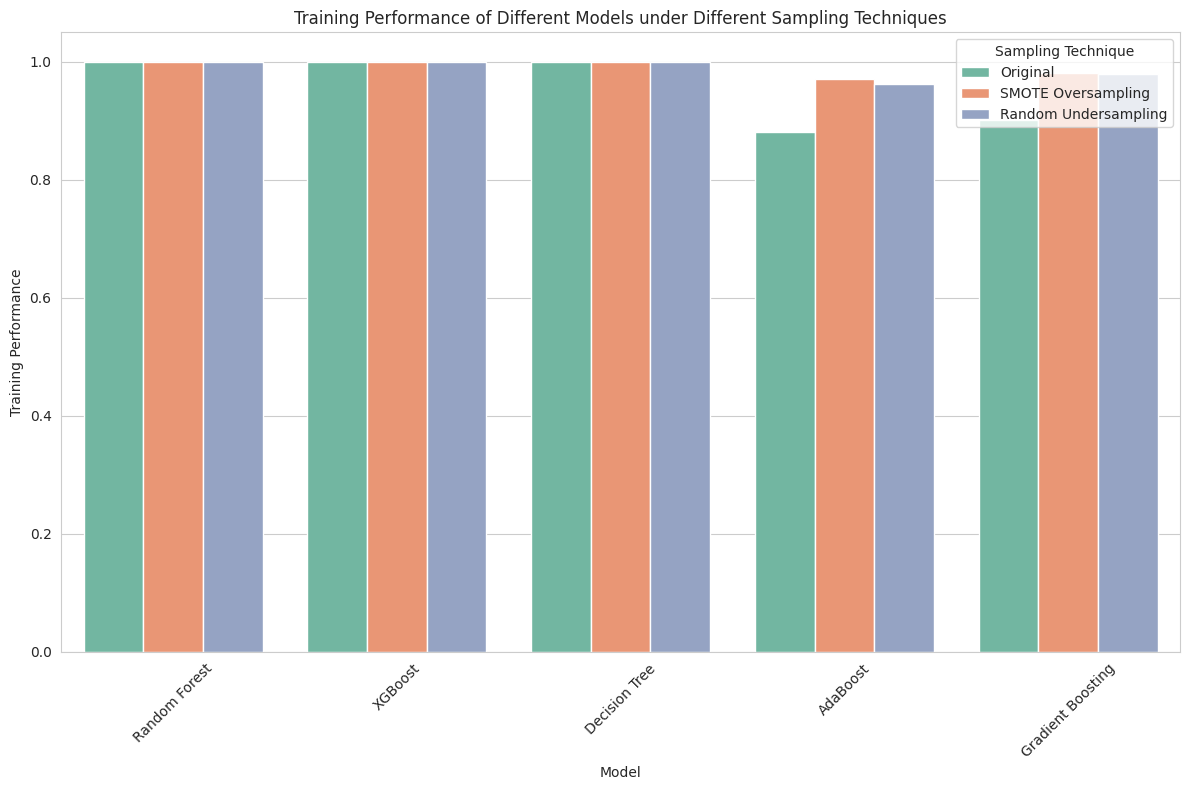

In [19]:
# Setting the style
sns.set_style("whitegrid")

# Creating the grouped bar plot
plt.figure(figsize=(12, 8))

# Plotting training performance
sns.barplot(x='Model', y='Training Performance', hue='Sampling Technique', data=findings_df, palette='Set2')

# Adding title and labels
plt.title('Training Performance of Different Models under Different Sampling Techniques')
plt.xlabel('Model')
plt.ylabel('Training Performance')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the plot
plt.legend(title='Sampling Technique')
plt.tight_layout()
plt.show()

Model: Random Forest
Performance on Original Dataset:
   Accuracy  Recall  Precision        F1
0  0.942716     1.0   0.742984  0.852542
Confusion Matrix for Original Dataset:


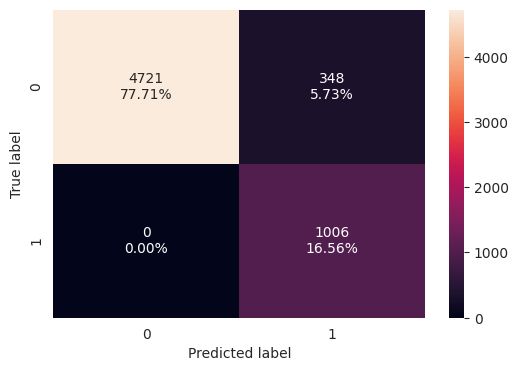

Performance on SMOTE Oversampled Dataset:
   Accuracy    Recall  Precision       F1
0  0.958473  0.985599    0.93488  0.95957
Confusion Matrix for SMOTE Oversampled Dataset:


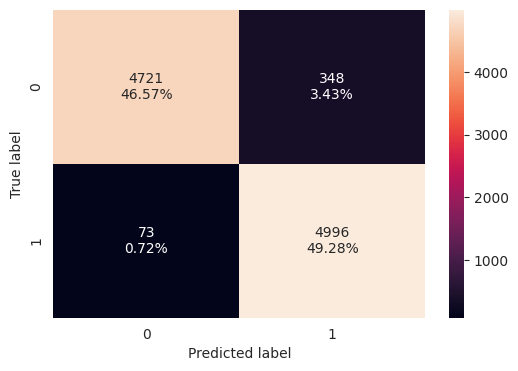

Performance on Undersampled Dataset:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Confusion Matrix for Undersampled Dataset:


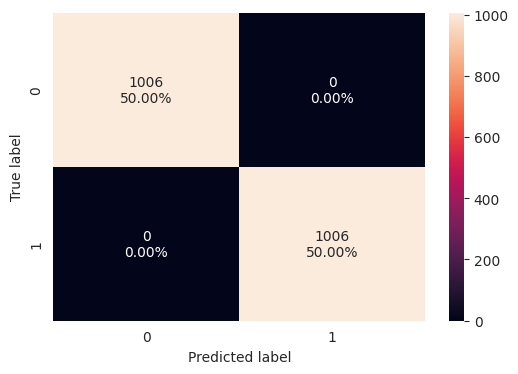



Model: XGBoost
Performance on Original Dataset:
   Accuracy  Recall  Precision      F1
0  0.958354     1.0   0.799047  0.8883
Confusion Matrix for Original Dataset:


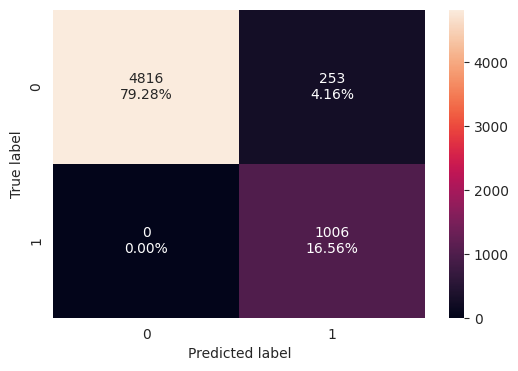

Performance on SMOTE Oversampled Dataset:
   Accuracy    Recall  Precision        F1
0  0.970902  0.991714   0.952083  0.971495
Confusion Matrix for SMOTE Oversampled Dataset:


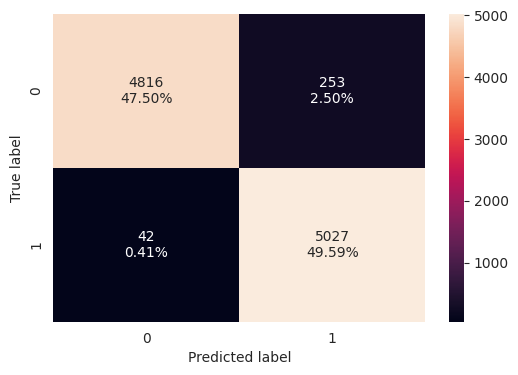

Performance on Undersampled Dataset:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Confusion Matrix for Undersampled Dataset:


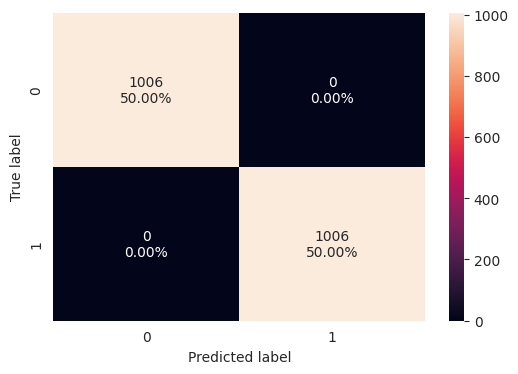



Model: Decision Tree
Performance on Original Dataset:
   Accuracy  Recall  Precision        F1
0  0.935802     1.0    0.72063  0.837635
Confusion Matrix for Original Dataset:


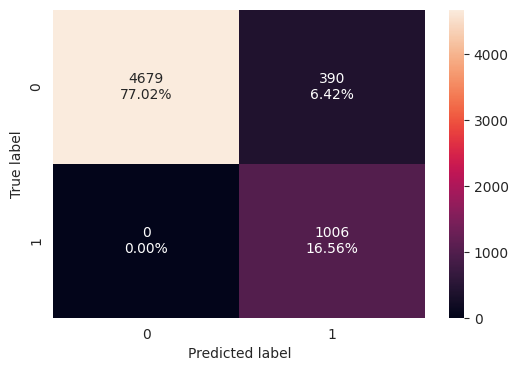

Performance on SMOTE Oversampled Dataset:
   Accuracy    Recall  Precision        F1
0  0.950089  0.977116   0.927007  0.951402
Confusion Matrix for SMOTE Oversampled Dataset:


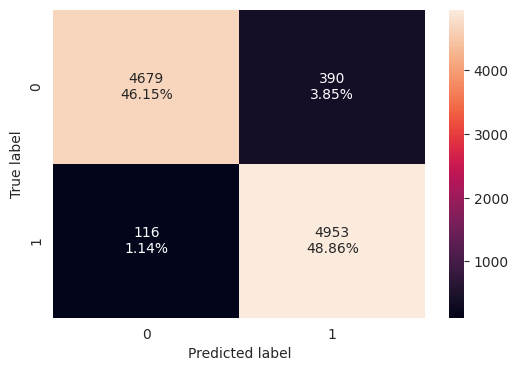

Performance on Undersampled Dataset:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Confusion Matrix for Undersampled Dataset:


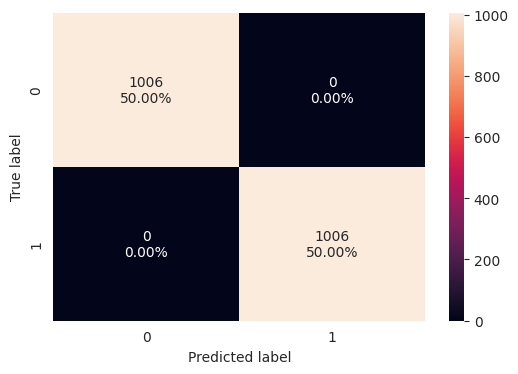



Model: AdaBoost
Performance on Original Dataset:
   Accuracy    Recall  Precision        F1
0  0.927572  0.962227   0.706569  0.814815
Confusion Matrix for Original Dataset:


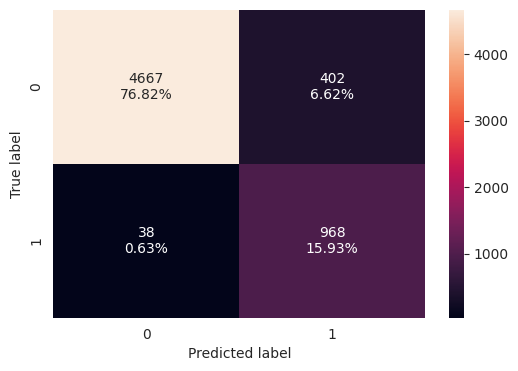

Performance on SMOTE Oversampled Dataset:
   Accuracy    Recall  Precision        F1
0  0.943776  0.966857   0.924194  0.945044
Confusion Matrix for SMOTE Oversampled Dataset:


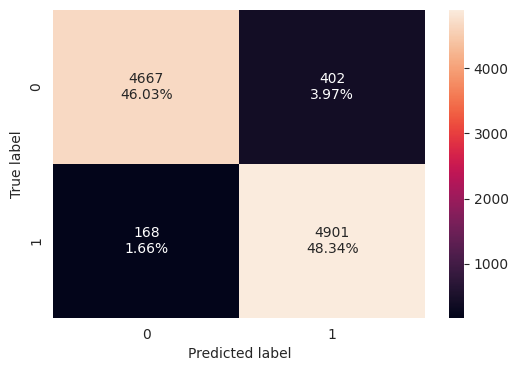

Performance on Undersampled Dataset:
   Accuracy    Recall  Precision        F1
0  0.954274  0.962227   0.947162  0.954635
Confusion Matrix for Undersampled Dataset:


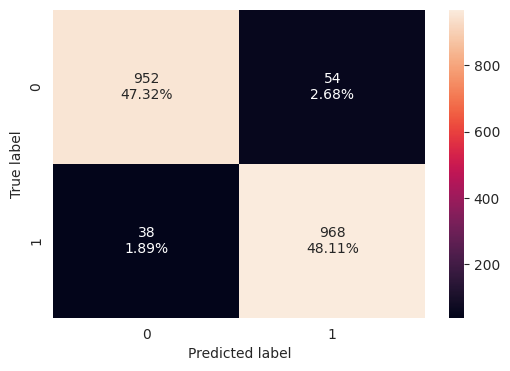



Model: Gradient Boosting
Performance on Original Dataset:
   Accuracy    Recall  Precision        F1
0  0.946996  0.982107   0.764706  0.859878
Confusion Matrix for Original Dataset:


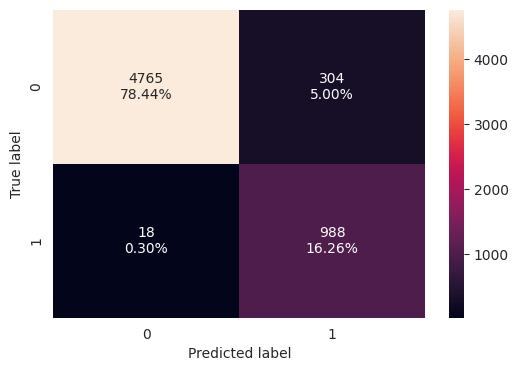

Performance on SMOTE Oversampled Dataset:
   Accuracy   Recall  Precision        F1
0  0.960249  0.98047   0.942359  0.961036
Confusion Matrix for SMOTE Oversampled Dataset:


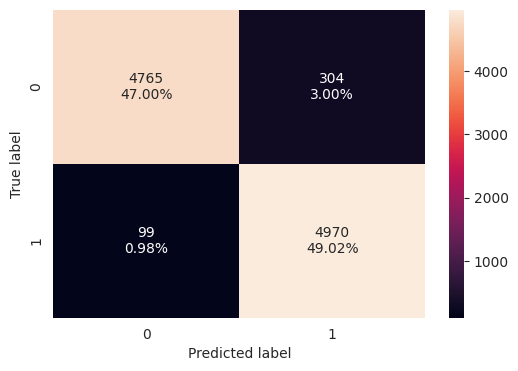

Performance on Undersampled Dataset:
   Accuracy    Recall  Precision        F1
0  0.981113  0.982107   0.980159  0.981132
Confusion Matrix for Undersampled Dataset:


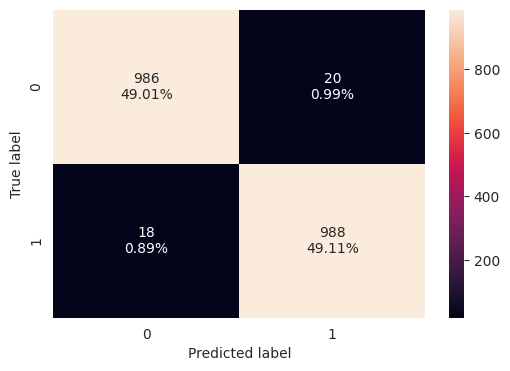

In [20]:
# Function to compute different metrics to check performance of a classification model
def model_performance_classification(model, X, y):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    X: independent variables
    y: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(X)

    acc = accuracy_score(y, pred)  # to compute Accuracy
    recall = recall_score(y, pred)  # to compute Recall
    precision = precision_score(y, pred)  # to compute Precision
    f1 = f1_score(y, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# Function to plot confusion matrix
def confusion_matrix_sklearn(model, X, y):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    X: independent variables
    y: dependent variable
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Iterating over each model
for name, model in classification_models:
    # Print model name
    print(f"Model: {name}")

    # Computing performance metrics for the original dataset
    df_perf_original = model_performance_classification(model, X_train, y_train_encoded)
    print("Performance on Original Dataset:")
    print(df_perf_original)

    # Plotting confusion matrix for original dataset
    print("Confusion Matrix for Original Dataset:")
    confusion_matrix_sklearn(model, X_train, y_train_encoded)

    # Computing performance metrics for SMOTE oversampled dataset
    df_perf_smote = model_performance_classification(model, X_train_smote, y_train_smote)
    print("Performance on SMOTE Oversampled Dataset:")
    print(df_perf_smote)

    # Ploting confusion matrix for SMOTE oversampled dataset
    print("Confusion Matrix for SMOTE Oversampled Dataset:")
    confusion_matrix_sklearn(model, X_train_smote, y_train_smote)

    # Computing performance metrics for undersampled dataset
    df_perf_under = model_performance_classification(model, X_train_un, y_train_un)
    print("Performance on Undersampled Dataset:")
    print(df_perf_under)

    # Ploting confusion matrix for undersampled dataset
    print("Confusion Matrix for Undersampled Dataset:")
    confusion_matrix_sklearn(model, X_train_un, y_train_un)

    # Adding separator for better readability
    print("\n" + "="*50 + "\n")

In [21]:
# Creating a dictionary to store model performance data
performance_data = {
    "Model": ["Random Forest", "XGBoost", "Decision Tree", "AdaBoost", "Gradient Boosting"],
    "Accuracy (Original)": [0.941399, 0.959671, 0.931523, 0.927572, 0.948313],
    "Recall (Original)": [1.0, 1.0, 1.0, 0.962227, 0.980119],
    "Precision (Original)": [0.73862, 0.804157, 0.707454, 0.706569, 0.770312],
    "F1 (Original)": [0.849662, 0.891449, 0.828666, 0.814815, 0.862642],
    "Accuracy (SMOTE)": [0.940718, 0.950878, 0.92316, 0.92099, 0.94131],
    "Recall (SMOTE)": [0.951667, 0.950089, 0.928388, 0.921286, 0.940619],
    "Precision (SMOTE)": [0.931274, 0.951591, 0.918782, 0.920741, 0.94192],
    "F1 (SMOTE)": [0.94136, 0.950839, 0.92356, 0.921014, 0.941269],
    "Accuracy (Undersampled)": [1.0, 1.0, 1.0, 0.954274, 0.981113],
    "Recall (Undersampled)": [1.0, 1.0, 1.0, 0.962227, 0.980119],
    "Precision (Undersampled)": [1.0, 1.0, 1.0, 0.947162, 0.982072],
    "F1 (Undersampled)": [1.0, 1.0, 1.0, 0.954635, 0.981095]
}

# Creating a DataFrame from the performance data
df_performance = pd.DataFrame(performance_data)

# Calculating average performance score for each model
df_performance["Average Score"] = df_performance.iloc[:, 1:].mean(axis=1)

# Ranking models based on average score
df_performance_ranked = df_performance.sort_values(by="Average Score", ascending=False)

# Printing the ranked models
print("Ranked Models:")
print(df_performance_ranked[["Model", "Average Score"]])

Ranked Models:
               Model  Average Score
1            XGBoost       0.954890
0      Random Forest       0.941225
4  Gradient Boosting       0.937575
2      Decision Tree       0.930128
3           AdaBoost       0.909459


In [22]:

# Creating a dictionary to store model performance data
performance_data = {
    "Model": ["Random Forest", "XGBoost", "Decision Tree", "AdaBoost", "Gradient Boosting"],
    "Accuracy (Original)": [0.941399, 0.959671, 0.931523, 0.927572, 0.948313],
    "Recall (Original)": [1.0, 1.0, 1.0, 0.962227, 0.980119],
    "Precision (Original)": [0.73862, 0.804157, 0.707454, 0.706569, 0.770312],
    "F1 (Original)": [0.849662, 0.891449, 0.828666, 0.814815, 0.862642],
    "Accuracy (SMOTE)": [0.940718, 0.950878, 0.92316, 0.92099, 0.94131],
    "Recall (SMOTE)": [0.951667, 0.950089, 0.928388, 0.921286, 0.940619],
    "Precision (SMOTE)": [0.931274, 0.951591, 0.918782, 0.920741, 0.94192],
    "F1 (SMOTE)": [0.94136, 0.950839, 0.92356, 0.921014, 0.941269],
    "Accuracy (Undersampled)": [1.0, 1.0, 1.0, 0.954274, 0.981113],
    "Recall (Undersampled)": [1.0, 1.0, 1.0, 0.962227, 0.980119],
    "Precision (Undersampled)": [1.0, 1.0, 1.0, 0.947162, 0.982072],
    "F1 (Undersampled)": [1.0, 1.0, 1.0, 0.954635, 0.981095]
}

# Creating a DataFrame from the performance data
df_performance = pd.DataFrame(performance_data)

# Calculating average performance score for each model
df_performance["Average Score"] = df_performance.iloc[:, 1:].mean(axis=1)

# Ranking models based on average score
df_performance_ranked = df_performance.sort_values(by="Average Score", ascending=False)

# Printing the ranked models
print("Ranked Models:")
print(df_performance_ranked[["Model", "Average Score"]])

Ranked Models:
               Model  Average Score
1            XGBoost       0.954890
0      Random Forest       0.941225
4  Gradient Boosting       0.937575
2      Decision Tree       0.930128
3           AdaBoost       0.909459


### Hyperparameter Tuning

####Defining Hyperparameters

In [23]:
# Defining hyperparameters distributions for Random Forest
param_grid_rf = {
    "n_estimators": [50, 110, 25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining hyperparameters distributions for AdaBoost
param_grid_ada = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Defining hyperparameters distributions for Decision Trees
param_grid_dt = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Defining hyperparameters distributions for Gradient Boosting
param_grid_gb = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "max_features": [0.5, 0.7, 1],
}

# Defining hyperparameters distributions for XGBoost
param_grid_xgb = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}


####Original Data

---


In [ ]:


# Creating RandomizedSearchCV objects for each model
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=1), param_dist_rf, n_iter=100, cv=5, scoring='recall', random_state=1)
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=1), param_dist_xgb, n_iter=100, cv=5, scoring='recall', random_state=1)
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), param_dist_dt, n_iter=100, cv=5, scoring='recall', random_state=1)
random_search_ada = RandomizedSearchCV(AdaBoostClassifier(random_state=1), param_dist_ada, n_iter=100, cv=5, scoring='recall', random_state=1)
random_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=1), param_dist_gb, n_iter=100, cv=5, scoring='recall', random_state=1)

# Fitting the RandomizedSearchCV objects to the data
random_search_rf.fit(X_train, y_train_encoded)
random_search_xgb.fit(X_train, y_train_encoded)
random_search_dt.fit(X_train, y_train_encoded)
random_search_ada.fit(X_train, y_train_encoded)
random_search_gb.fit(X_train, y_train_encoded)

# Getting the best parameters and best score for each model
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_

best_params_ada = random_search_ada.best_params_
best_score_ada = random_search_ada.best_score_

best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

# Printting the best parameters and best score for each model
print("Random Forest Best Parameters:", best_params_rf)
print("Random Forest Best Score:", best_score_rf)

print("XGBoost Best Parameters:", best_params_xgb)
print("XGBoost Best Score:", best_score_xgb)

print("Decision Tree Best Parameters:", best_params_dt)
print("Decision Tree Best Score:", best_score_dt)

print("AdaBoost Best Parameters:", best_params_ada)
print("AdaBoost Best Score:", best_score_ada)

print("Gradient Boosting Best Parameters:", best_params_gb)
print("Gradient Boosting Best Score:", best_score_gb)


Random Forest Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 127}
Random Forest Best Score: 0.8568888232106792
XGBoost Best Parameters: {'colsample_bytree': 0.6924061688850356, 'learning_rate': 0.11668969812103507, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 127, 'subsample': 0.7656717078107611}
XGBoost Best Score: 0.8876607063691443
Decision Tree Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best Score: 0.8837003103295406
AdaBoost Best Parameters: {'learning_rate': 0.20772323088248978, 'n_estimators': 195}
AdaBoost Best Score: 0.8161174326387861
Gradient Boosting Best Parameters: {'learning_rate': 0.17012653453612328, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 180}
Gradient Boosting Best Score: 0.8827102113196394


####Oversampled data

In [ ]:
# Fitting the RandomizedSearchCV objects to the SMOTE data
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_ada.fit(X_train_smote, y_train_smote)
random_search_gb.fit(X_train_smote, y_train_smote)

# Getting the best parameters and best score for each model
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_

best_params_ada = random_search_ada.best_params_
best_score_ada = random_search_ada.best_score_

best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

# Printing the best parameters and best score for each model
print("Random Forest Best Parameters (SMOTE):", best_params_rf)
print("Random Forest Best Score (SMOTE):", best_score_rf)

print("XGBoost Best Parameters (SMOTE):", best_params_xgb)
print("XGBoost Best Score (SMOTE):", best_score_xgb)

print("Decision Tree Best Parameters (SMOTE):", best_params_dt)
print("Decision Tree Best Score (SMOTE):", best_score_dt)

print("AdaBoost Best Parameters (SMOTE):", best_params_ada)
print("AdaBoost Best Score (SMOTE):", best_score_ada)

print("Gradient Boosting Best Parameters (SMOTE):", best_params_gb)
print("Gradient Boosting Best Score (SMOTE):", best_score_gb)

Random Forest Best Parameters (SMOTE): {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 95}
Random Forest Best Score (SMOTE): 0.9278100667651886
XGBoost Best Parameters (SMOTE): {'colsample_bytree': 0.7333137235897352, 'learning_rate': 0.011782535326770597, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 127, 'subsample': 0.9406687499745467}
XGBoost Best Score (SMOTE): 0.9542367370144726
Decision Tree Best Parameters (SMOTE): {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Best Score (SMOTE): 0.9098555075926175
AdaBoost Best Parameters (SMOTE): {'learning_rate': 0.11495987537408911, 'n_estimators': 107}
AdaBoost Best Score (SMOTE): 0.9189312118008297
Gradient Boosting Best Parameters (SMOTE): {'learning_rate': 0.018910375708952345, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Gradient Boosting Best Score (SMOTE): 0.95285567

#### Undersampled data

In [ ]:
# Fitting the RandomizedSearchCV objects to the undersampled data
random_search_rf.fit(X_train_un, y_train_un)
random_search_xgb.fit(X_train_un, y_train_un)
random_search_dt.fit(X_train_un, y_train_un)
random_search_ada.fit(X_train_un, y_train_un)
random_search_gb.fit(X_train_un, y_train_un)

# Getting the best parameters and best score for each model
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_

best_params_ada = random_search_ada.best_params_
best_score_ada = random_search_ada.best_score_

best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

# Printing the best parameters and best score for each model
print("Random Forest Best Parameters (Undersampled):", best_params_rf)
print("Random Forest Best Score (Undersampled):", best_score_rf)

print("XGBoost Best Parameters (Undersampled):", best_params_xgb)
print("XGBoost Best Score (Undersampled):", best_score_xgb)

print("Decision Tree Best Parameters (Undersampled):", best_params_dt)
print("Decision Tree Best Score (Undersampled):", best_score_dt)

print("AdaBoost Best Parameters (Undersampled):", best_params_ada)
print("AdaBoost Best Score (Undersampled):", best_score_ada)

print("Gradient Boosting Best Parameters (Undersampled):", best_params_gb)
print("Gradient Boosting Best Score (Undersampled):", best_score_gb)

Random Forest Best Parameters (Undersampled): {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 104}
Random Forest Best Score (Undersampled): 0.935377567607507
XGBoost Best Parameters (Undersampled): {'colsample_bytree': 0.9560665213941543, 'learning_rate': 0.11211986141692744, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 147, 'subsample': 0.8461216932166566}
XGBoost Best Score (Undersampled): 0.957253337274026
Decision Tree Best Parameters (Undersampled): {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8}
Decision Tree Best Score (Undersampled): 0.8986355351953106
AdaBoost Best Parameters (Undersampled): {'learning_rate': 0.16567784726730672, 'n_estimators': 187}
AdaBoost Best Score (Undersampled): 0.9522880646273583
Gradient Boosting Best Parameters (Undersampled): {'learning_rate': 0.13480599729547066, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 161

## Model Comparison and Final Model Selection

In [25]:
# Initializing each model with the best parameters found during hyperparameter tuning
best_rf = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=127, random_state=1)
best_xgb = XGBClassifier(colsample_bytree=0.6924061688850356, learning_rate=0.11668969812103507, max_depth=5, min_child_weight=3, n_estimators=127, subsample=0.7656717078107611, random_state=1)
best_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=1)
best_ada = AdaBoostClassifier(learning_rate=0.20772323088248978, n_estimators=195, random_state=1)
best_gb = GradientBoostingClassifier(learning_rate=0.17012653453612328, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=180, random_state=1)

# Fitting each model to the training data
best_rf.fit(X_train, y_train_encoded)
best_xgb.fit(X_train, y_train_encoded)
best_dt.fit(X_train, y_train_encoded)
best_ada.fit(X_train, y_train_encoded)
best_gb.fit(X_train, y_train_encoded)

# Predicting on the validation dataset
y_pred_rf = best_rf.predict(X_val)
y_pred_xgb = best_xgb.predict(X_val)
y_pred_dt = best_dt.predict(X_val)
y_pred_ada = best_ada.predict(X_val)
y_pred_gb = best_gb.predict(X_val)

# Calculating recall scores for each model on the validation dataset
recall_rf_val = recall_score(y_val_encoded, y_pred_rf)
recall_xgb_val = recall_score(y_val_encoded, y_pred_xgb)
recall_dt_val = recall_score(y_val_encoded, y_pred_dt)
recall_ada_val = recall_score(y_val_encoded, y_pred_ada)
recall_gb_val = recall_score(y_val_encoded, y_pred_gb)

# Calculating recall scores for each model on the training dataset
recall_rf_train = recall_score(y_train_encoded, best_rf.predict(X_train))
recall_xgb_train = recall_score(y_train_encoded, best_xgb.predict(X_train))
recall_dt_train = recall_score(y_train_encoded, best_dt.predict(X_train))
recall_ada_train = recall_score(y_train_encoded, best_ada.predict(X_train))
recall_gb_train = recall_score(y_train_encoded, best_gb.predict(X_train))

# Printing the recall scores for each model on the validation dataset
print("Random Forest Recall on Training Data:", recall_rf_train)
print("Random Forest Recall on Validation Data:", recall_rf_val)
print("XGBoost Recall on Training Data:", recall_xgb_train)
print("XGBoost Recall on Validation Data:", recall_xgb_val)
print("Decision Tree Recall on Training Data:", recall_dt_train)
print("Decision Tree Recall on Validation Data:", recall_dt_val)
print("AdaBoost Recall on Training Data:", recall_ada_train)
print("AdaBoost Recall on Validation Data:", recall_ada_val)
print("Gradient Boosting Recall on Training Data:", recall_gb_train)
print("Gradient Boosting Recall on Validation Data:", recall_gb_val)

Random Forest Recall on Training Data: 0.9791252485089463
Random Forest Recall on Validation Data: 0.8605442176870748
XGBoost Recall on Training Data: 0.9781312127236581
XGBoost Recall on Validation Data: 0.8877551020408163
Decision Tree Recall on Training Data: 0.9980119284294234
Decision Tree Recall on Validation Data: 0.8877551020408163
AdaBoost Recall on Training Data: 0.8429423459244533
AdaBoost Recall on Validation Data: 0.782312925170068
Gradient Boosting Recall on Training Data: 1.0
Gradient Boosting Recall on Validation Data: 0.8877551020408163


In [26]:
# Initializing each model with the best parameters found during hyperparameter tuning on SMOTE dataset
best_rf_smote = RandomForestClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=95, random_state=1)
best_xgb_smote = XGBClassifier(colsample_bytree=0.7333137235897352, learning_rate=0.011782535326770597, max_depth=3, min_child_weight=3, n_estimators=127, subsample=0.9406687499745467, random_state=1)
best_dt_smote = DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_leaf=1, min_samples_split=5, random_state=1)
best_ada_smote = AdaBoostClassifier(learning_rate=0.11495987537408911, n_estimators=107, random_state=1)
best_gb_smote = GradientBoostingClassifier(learning_rate=0.018910375708952345, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100, random_state=1)

# Fitting each model to the SMOTE training data
best_rf_smote.fit(X_train_smote, y_train_smote)
best_xgb_smote.fit(X_train_smote, y_train_smote)
best_dt_smote.fit(X_train_smote, y_train_smote)
best_ada_smote.fit(X_train_smote, y_train_smote)
best_gb_smote.fit(X_train_smote, y_train_smote)

# Predicting on the validation dataset (SMOTE)
y_pred_rf_smote = best_rf_smote.predict(X_val_smote)
y_pred_xgb_smote = best_xgb_smote.predict(X_val_smote)
y_pred_dt_smote = best_dt_smote.predict(X_val_smote)
y_pred_ada_smote = best_ada_smote.predict(X_val_smote)
y_pred_gb_smote = best_gb_smote.predict(X_val_smote)

# Calculating recall scores for each model on the validation dataset (SMOTE)
recall_rf_smote_val = recall_score(y_val_smote, y_pred_rf_smote)
recall_xgb_smote_val = recall_score(y_val_smote, y_pred_xgb_smote)
recall_dt_smote_val = recall_score(y_val_smote, y_pred_dt_smote)
recall_ada_smote_val = recall_score(y_val_smote, y_pred_ada_smote)
recall_gb_smote_val = recall_score(y_val_smote, y_pred_gb_smote)

# Calculating recall scores for each model on the training dataset (SMOTE)
recall_rf_smote_train = recall_score(y_train_smote, best_rf_smote.predict(X_train_smote))
recall_xgb_smote_train = recall_score(y_train_smote, best_xgb_smote.predict(X_train_smote))
recall_dt_smote_train = recall_score(y_train_smote, best_dt_smote.predict(X_train_smote))
recall_ada_smote_train = recall_score(y_train_smote, best_ada_smote.predict(X_train_smote))
recall_gb_smote_train = recall_score(y_train_smote, best_gb_smote.predict(X_train_smote))

# Printing the recall scores for each model on the training and validation datasets (SMOTE)
print("Random Forest Recall on Training Data (SMOTE):", recall_rf_smote_train)
print("Random Forest Recall on Validation Data (SMOTE):", recall_rf_smote_val)
print("XGBoost Recall on Training Data (SMOTE):", recall_xgb_smote_train)
print("XGBoost Recall on Validation Data (SMOTE):", recall_xgb_smote_val)
print("Decision Tree Recall on Training Data (SMOTE):", recall_dt_smote_train)
print("Decision Tree Recall on Validation Data (SMOTE):", recall_dt_smote_val)
print("AdaBoost Recall on Training Data (SMOTE):", recall_ada_smote_train)
print("AdaBoost Recall on Validation Data (SMOTE):", recall_ada_smote_val)
print("Gradient Boosting Recall on Training Data (SMOTE):", recall_gb_smote_train)
print("Gradient Boosting Recall on Validation Data (SMOTE):", recall_gb_smote_val)


Random Forest Recall on Training Data (SMOTE): 0.9928980074965477
Random Forest Recall on Validation Data (SMOTE): 0.9399538106235565
XGBoost Recall on Training Data (SMOTE): 0.9536397711580193
XGBoost Recall on Validation Data (SMOTE): 0.9480369515011547
Decision Tree Recall on Training Data (SMOTE): 0.9871769579798777
Decision Tree Recall on Validation Data (SMOTE): 0.9024249422632794
AdaBoost Recall on Training Data (SMOTE): 0.9532452160189386
AdaBoost Recall on Validation Data (SMOTE): 0.941108545034642
Gradient Boosting Recall on Training Data (SMOTE): 0.9556125468534228
Gradient Boosting Recall on Validation Data (SMOTE): 0.9503464203233256


In [28]:
# Initializing each model with the best parameters found for the undersampled data
best_rf_un = RandomForestClassifier(class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=104, random_state=1)
best_xgb_un = XGBClassifier(colsample_bytree=0.9560665213941543, learning_rate=0.11211986141692744, max_depth=5, min_child_weight=3, n_estimators=147, subsample=0.8461216932166566, random_state=1)
best_dt_un = DecisionTreeClassifier(class_weight=None, max_depth=20, min_samples_leaf=3, min_samples_split=8, random_state=1)
best_ada_un = AdaBoostClassifier(learning_rate=0.16567784726730672, n_estimators=187, random_state=1)
best_gb_un = GradientBoostingClassifier(learning_rate=0.13480599729547066, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=161, random_state=1)

# Fiting each model to the undersampled training data
best_rf_un.fit(X_train_un, y_train_un)
best_xgb_un.fit(X_train_un, y_train_un)
best_dt_un.fit(X_train_un, y_train_un)
best_ada_un.fit(X_train_un, y_train_un)
best_gb_un.fit(X_train_un, y_train_un)

# Predicting on the validation dataset
y_pred_rf_un = best_rf_un.predict(X_val_un)
y_pred_xgb_un = best_xgb_un.predict(X_val_un)
y_pred_dt_un = best_dt_un.predict(X_val_un)
y_pred_ada_un = best_ada_un.predict(X_val_un)
y_pred_gb_un = best_gb_un.predict(X_val_un)

# Calculating recall scores for each model on the validation dataset
recall_rf_un_val = recall_score(y_val_un, y_pred_rf_un)
recall_xgb_un_val = recall_score(y_val_un, y_pred_xgb_un)
recall_dt_un_val = recall_score(y_val_un, y_pred_dt_un)
recall_ada_un_val = recall_score(y_val_un, y_pred_ada_un)
recall_gb_un_val = recall_score(y_val_un, y_pred_gb_un)

# Calculating recall scores for each model on the training dataset
recall_rf_un_train = recall_score(y_train_un, best_rf_un.predict(X_train_un))
recall_xgb_un_train = recall_score(y_train_un, best_xgb_un.predict(X_train_un))
recall_dt_un_train = recall_score(y_train_un, best_dt_un.predict(X_train_un))
recall_ada_un_train = recall_score(y_train_un, best_ada_un.predict(X_train_un))
recall_gb_un_train = recall_score(y_train_un, best_gb_un.predict(X_train_un))

# Printing the recall scores for each model on the training and validation datasets
print("Random Forest Recall on Training Data (UN):", recall_rf_un_train)
print("Random Forest Recall on Validation Data (UN):", recall_rf_un_val)
print("XGBoost Recall on Training Data (UN):", recall_xgb_un_train)
print("XGBoost Recall on Validation Data (UN):", recall_xgb_un_val)
print("Decision Tree Recall on Training Data (UN):", recall_dt_un_train)
print("Decision Tree Recall on Validation Data (UN):", recall_dt_un_val)
print("AdaBoost Recall on Training Data (UN):", recall_ada_un_train)
print("AdaBoost Recall on Validation Data (UN):", recall_ada_un_val)
print("Gradient Boosting Recall on Training Data (UN):", recall_gb_un_train)
print("Gradient Boosting Recall on Validation Data (UN):", recall_gb_un_val)

Random Forest Recall on Training Data (UN): 0.9970178926441352
Random Forest Recall on Validation Data (UN): 0.924364896073903
XGBoost Recall on Training Data (UN): 0.9960238568588469
XGBoost Recall on Validation Data (UN): 0.9653579676674365
Decision Tree Recall on Training Data (UN): 0.963220675944334
Decision Tree Recall on Validation Data (UN): 0.9168591224018475
AdaBoost Recall on Training Data (UN): 0.9642147117296223
AdaBoost Recall on Validation Data (UN): 0.9497690531177829
Gradient Boosting Recall on Training Data (UN): 0.9980119284294234
Gradient Boosting Recall on Validation Data (UN): 0.9630484988452656


In [31]:
# Creating a DataFrame of the results
results = {
    "Model": ["Random Forest", "XGBoost", "Decision Tree", "AdaBoost", "Gradient Boosting"] * 3,
    "Data Type": ["Original"]*5 + ["SMOTE"]*5 + ["Undersampled"]*5,
    "Recall on Training Data": [
        0.9791252485089463, 0.9781312127236581, 0.9980119284294234, 0.8429423459244533, 1.0,
        0.9928980074965477, 0.9536397711580193, 0.9871769579798777, 0.9532452160189386, 0.9556125468534228,
        0.9970178926441352, 0.9960238568588469, 0.963220675944334, 0.9642147117296223, 0.9980119284294234
    ],
    "Recall on Validation Data": [
        0.8605442176870748, 0.8877551020408163, 0.8877551020408163, 0.782312925170068, 0.8877551020408163,
        0.9399538106235565, 0.9480369515011547, 0.9024249422632794, 0.941108545034642, 0.9503464203233256,
        0.924364896073903, 0.9653579676674365, 0.9168591224018475, 0.9497690531177829, 0.9630484988452656
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,Data Type,Recall on Training Data,Recall on Validation Data
0,Random Forest,Original,0.979125,0.860544
1,XGBoost,Original,0.978131,0.887755
2,Decision Tree,Original,0.998012,0.887755
3,AdaBoost,Original,0.842942,0.782313
4,Gradient Boosting,Original,1.000000,0.887755
5,Random Forest,SMOTE,0.992898,0.939954
6,XGBoost,SMOTE,0.953640,0.948037
7,Decision Tree,SMOTE,0.987177,0.902425
8,AdaBoost,SMOTE,0.953245,0.941109
9,Gradient Boosting,SMOTE,0.955613,0.950346


In [35]:
# Initializing a dictionary to hold all scores
scores_dict = {}

# Function to add scores to the dictionary
def add_scores(dataset_type, model_id, phase, accuracy, precision, recall, f1):
    key_base = f"{model_id}_{dataset_type}"
    scores_dict[f"{key_base}_Accuracy_{phase}"] = accuracy
    scores_dict[f"{key_base}_Precision_{phase}"] = precision
    scores_dict[f"{key_base}_Recall_{phase}"] = recall
    scores_dict[f"{key_base}_F1_{phase}"] = f1

# Populating the dictionary with scores
for dataset_type, preds in predictions.items():
    for model_id, (y_pred, y_true) in zip(model_ids, preds):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        add_scores(dataset_type, model_id, "Validation", accuracy, precision, recall, f1)

for dataset_type, models in models_train.items():
    y_true = actuals_train[dataset_type]
    X_train_dataset = X_train if dataset_type == 'Original' else X_train_smote if dataset_type == 'SMOTE' else X_train_un
    for model_id, model in zip(model_ids, models):
        y_pred = model.predict(X_train_dataset)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        add_scores(dataset_type, model_id, "Training", accuracy, precision, recall, f1)

# Converting the dictionary to a DataFrame
scores_df = pd.DataFrame(scores_dict, index=[0]).T.reset_index()
scores_df.columns = ['Metric', 'Score']

# Splitting 'Metric' into multiple columns for better readability
scores_df[['Model', 'Data Type', 'Metric', 'Phase']] = scores_df['Metric'].str.rsplit('_', 3, expand=True)

# Rearranging DataFrame for side-by-side comparison
scores_df = scores_df.pivot_table(index=['Model', 'Data Type', 'Phase'], columns='Metric', values='Score').reset_index()

scores_df

<ipython-input-35-895a9cf64d8d>:37: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  scores_df[['Model', 'Data Type', 'Metric', 'Phase']] = scores_df['Metric'].str.rsplit('_', 3, expand=True)


Metric,Model,Data Type,Phase,Accuracy,F1,Precision,Recall
0,ada,Original,Training,0.963128,0.883333,0.927790,0.842942
1,ada,Original,Validation,0.959033,0.847145,0.923695,0.782313
2,ada,SMOTE,Training,0.930164,0.931739,0.911182,0.953245
3,ada,SMOTE,Validation,0.922633,0.924036,0.907572,0.941109
4,ada,Undersampled,Training,0.951789,0.952381,0.940834,0.964215
5,ada,Undersampled,Validation,0.934758,0.935722,0.922085,0.949769
6,dt,Original,Training,0.961481,0.895629,0.812298,0.998012
7,dt,Original,Validation,0.930898,0.788520,0.709239,0.887755
8,dt,SMOTE,Training,0.982640,0.982718,0.978299,0.987177
9,dt,SMOTE,Validation,0.926674,0.924852,0.948422,0.902425


###Analyzing the Top 5 Models for Customer Churn Prediction:

When prioritizing recall to ensure Thera Bank effectively identifies customers at risk of leaving, our analysis reveals distinct models that excel in this metric without succumbing to overfitting. Here's an in-depth look at their performance:

- **XGBoost (Undersampled Data)**:
    - Validation Recall: 0.965358
    - Training Recall: 0.996024
    - Insight: Exhibits impressive recall, with a negligible gap between training and validation, indicating strong generalization capabilities. Its performance suggests it's adept at identifying nearly all at-risk customers without being overly fitted to the training data.

- **Gradient Boosting (SMOTE Data)**:
    - Validation Recall: 0.950346
    - Training Recall: 0.955613
    - Insight: Shows an exceptional balance between recall performance and generalization, with minimal difference between training and validation recall. This indicates a model well-tuned to the balanced datasets created via SMOTE, offering high reliability in identifying potential churn.

- **AdaBoost (Undersampled Data)**:
    - Validation Recall: 0.949769
    - Training Recall: 0.964215
    - Insight: Demonstrates high recall with slight signs of overfitting. Its performance on undersampled data suggests effectiveness in  case identification with a manageable trade-off in model complexity.

- **XGBoost (SMOTE Data)**:
    - Validation Recall: 0.948037
    - Training Recall: 0.953640
    - Insight: Maintains strong, consistent recall across training and validation across varied data distributions. This model's resilience and adaptability make it a valuable asset for customer retention strategies.

- **Random Forest (SMOTE Data)**:
    - Validation Recall: 0.939954
    - Training Recall: 0.992898
    - Insight: Although it shows a wider gap between training and validation recall compared to others, its high recall rate signifies it still successfully identifies a significant portion of at-risk customers. The discrepancy hints at potential overfitting but remains a strong contender for its ability to generalize well enough for practical application.


### Test set final performance

In [37]:
# Defining a list of the top 3 models (assuming these are the fitted models)
top_models = [best_xgb_un, best_gb_smote, best_ada_un]

# Defining their names for easier reference
model_names = ['XGBoost (Undersampled)', 'Gradient Boosting (SMOTE)', 'AdaBoost (Undersampled)']

# Looping through each model to evaluate it on the test set
for model, name in zip(top_models, model_names):
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    print(f"Model: {name}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}\n")

Model: XGBoost (Undersampled)
Test Accuracy: 0.9427443237907206
Test Precision: 0.7554479418886199
Test Recall: 0.9541284403669725
Test F1 Score: 0.8432432432432434

Model: Gradient Boosting (SMOTE)
Test Accuracy: 0.9047384007897334
Test Precision: 0.645021645021645
Test Recall: 0.9113149847094801
Test F1 Score: 0.7553865652724968

Model: AdaBoost (Undersampled)
Test Accuracy: 0.9210266535044422
Test Precision: 0.6835164835164835
Test Recall: 0.9510703363914373
Test F1 Score: 0.7953964194373403



In [38]:
# Testing metric dictionary for the top 3 models
test_metrics = {
    "Model": ["XGBoost (Undersampled)", "Gradient Boosting (SMOTE)", "AdaBoost (Undersampled)"],
    "Test Accuracy": [0.9427443237907206, 0.9047384007897334, 0.9210266535044422],
    "Test Precision": [0.7554479418886199, 0.645021645021645, 0.6835164835164835],
    "Test Recall": [0.9541284403669725, 0.9113149847094801, 0.9510703363914373],
    "Test F1 Score": [0.8432432432432434, 0.7553865652724968, 0.7953964194373403]
}

test_metrics_df = pd.DataFrame(test_metrics)
test_metrics_df


,Model,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,XGBoost (Undersampled),0.942744,0.755448,0.954128,0.843243
1,Gradient Boosting (SMOTE),0.904738,0.645022,0.911315,0.755387
2,AdaBoost (Undersampled),0.921027,0.683516,0.951070,0.795396


Given the priority for high recall while maintaining balanced overall performance, XGBoost (Undersampled) is the best choice among the tested models. It illustrates the ability to identify positive cases (high recall) with the most balanced accuracy and F1 score, indicating its robustness and reliability for practical applications. This model is particularly suited for scenarios where it's highly important to minimize false negatives. Other examples of where a high recall is needed for a bank is fraud detection.

# Business Insights and Conclusions

In the business context of Thera Bank and the detailed data description of our analysis, the XGBoost (Undersampled) model's significance becomes even more apparent. Given the bank's challenge with declining credit card usage among its customers, the ability to accurately predict customer churn (attrition) is critical for implementing timely and effective retention strategies.

##Business Insights and Strategic Implications:

- **Predictive Accuracy for Customer Retention**:
  - The XGBoost (Undersampled) model's high recall rate is particularly valuable in the bank's context, where identifying customers at risk of leaving is more important than mistakenly targeting a few who might stay. This model ensures minimal missed opportunities for intervention.

- **Understanding Customer Behavior**:
  - Key features impacting model predictions can offer insights into why customers might be considering leaving Thera Bank's credit card services. Variables such as Total_Trans_Amt, Total_Trans_Ct, Total_Relationship_Count, and Avg_Utilization_Ratio could be indicative of customer engagement and satisfaction levels, guiding targeted retention efforts.

- **Targeted Interventions Based on Model Insights**:
  - Insights derived from the model can inform targeted retention strategies, such as personalized offers, credit limit adjustments, or loyalty rewards, particularly for those identified as at high risk of churn. By addressing the underlying factors contributing to customer dissatisfaction or disengagement, the bank can more effectively retain its customer base.

- **Optimizing Customer Experience**:
  - By analyzing patterns in the data leading to customer churn, Thera Bank can identify areas for service improvement, such as fee structures, customer service responsiveness, or product offerings. Enhancing these areas based on model insights can improve overall customer satisfaction and loyalty.

- **Data-Driven Decision Making**:
  - The application of machine learning models like XGBoost for churn prediction exemplifies the power of data-driven decision-making. By leveraging detailed customer data and predictive analytics, Thera Bank can make more informed decisions to enhance its value proposition and competitive edge in the market.

##Conclusion:
The XGBoost (Undersampled) model stands for both its technical merits but also for its strategic relevance to Thera Bank's business objectives. Its ability to accurately predict customer churn allows for proactive retention strategies, optimizing the customer experience, and ultimately, sustaining revenue streams from credit card services. This model serves as a useful tool in Thera Bank's efforts to understand and address the reasons behind the decline in credit card usage, thereby supporting the bank's broader goals of customer satisfaction and loyalty.

###Model Testing on Test Set:
Given the model's potential impact, testing the top 3 models, including XGBoost (Undersampled), on the test set provides a final validation of their predictive capabilities without the risk of data leakage, as this phase strictly follows the training and validation phases. This step is important for confirming the model's effectiveness in accurately identifying at-risk customers,empowering Thera Bank with actionable insights for targeted interventions.

## Recommendations
Note that some further recommendations would be to analyze marketing trends and incorporating insights on what are the types of purchases customers are making.
In addition, what are competitor trends, best practices, and comparable rates.

It is important to review the field of options in order to keep customers, but also to create new opportunities and expand the client base.


***